ASSINGMENT 2 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Load the datasets 
DATA_DIR = Path('.')  
cast = pd.read_csv(DATA_DIR / 'cast.csv')
release_dates = pd.read_csv(DATA_DIR / 'release_dates.csv')
titles = pd.read_csv(DATA_DIR / 'titles.csv')

# Convert date column
release_dates['date'] = pd.to_datetime(release_dates['date'], errors='coerce')
is_movie = (titles["type"].str.lower() == "movie") if "type" in titles else pd.Series(True, index=titles.index)


In [2]:
# Clean up 
titles.columns = titles.columns.str.lower().str.strip()
cast.columns = cast.columns.str.lower().str.strip()
release_dates.columns = release_dates.columns.str.lower().str.strip()

titles['year'] = pd.to_numeric(titles['year'], errors='coerce')
cast['year'] = pd.to_numeric(cast['year'], errors='coerce')
release_dates['date'] = pd.to_datetime(release_dates['date'], errors='coerce')


1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation.

In [3]:
def overview(df, name):
    print(f"--- {name} ---")
    print("rows:", len(df))
    print("columns:", list(df.columns))
    display(df.head())

overview(titles, "titles")
overview(cast, "cast")
overview(release_dates, "release_dates")


--- titles ---
rows: 226013
columns: ['title', 'year']


,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993


--- cast ---
rows: 3442902
columns: ['title', 'year', 'name', 'type', 'character', 'n']


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


--- release_dates ---
rows: 443486
columns: ['title', 'year', 'country', 'date']


,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


2. How many movies have the title North by Northwest

In [6]:
q2 = titles[is_movie & (titles["title"].str.casefold() == "north by northwest")]
print("Count:", len(q2))
display(q2[["title", "year"]].sort_values("year"))


Count: 1


,title,year
201761,North by Northwest,1959


3. How many version of Hamlet are there, when was the first made? the last?

In [7]:
ham = titles[is_movie & (titles["title"].str.casefold() == "hamlet")]
print("Count:", len(ham))
print("First year:", int(ham["year"].min()) if len(ham) else None)
print("Last year:",  int(ham["year"].max()) if len(ham) else None)
display(ham[["title","year"]].sort_values("year"))


Count: 20
First year: 1910
Last year: 2017


,title,year
79939,Hamlet,1910
129673,Hamlet,1911
164637,Hamlet,1913
221419,Hamlet,1921
221201,Hamlet,1948
220568,Hamlet,1954
113670,Hamlet,1964
73929,Hamlet,1969
204180,Hamlet,1973
64116,Hamlet,1976


4. List all the movies called Treasure Island from oldest to newest

In [9]:
treasure_island = titles[titles['title'] == 'Treasure Island'].sort_values('year')
print(treasure_island)


                  title  year
180911  Treasure Island  1918
108853  Treasure Island  1920
87953   Treasure Island  1934
126321  Treasure Island  1950
190233  Treasure Island  1972
122150  Treasure Island  1973
52099   Treasure Island  1985
36752   Treasure Island  1999


5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [10]:
years = [1950, 1980, 2000]
counts = {y: int(((titles["year"] == y) & is_movie).sum()) for y in years}
print(counts)  


{1950: 1109, 1980: 1750, 2000: 2568}


the the number of movie have been growing over time 

6. How big was the cast of Metropolis

In [14]:
metro = titles[is_movie & (titles["title"].str.casefold() == "metropolis")].sort_values("year")
if not metas.empty:
    t0 = metro.iloc[0]
    size = (cast["title_id"] == t0["title_id"]).sum() if "title_id" in cast and "title_id" in titles else \
           len(cast[cast["title"].str.casefold() == t0["title"].casefold()])  
    print(f"'{t0.title}' ({int(t0.year)}): cast size =", int(size))
    display(metro)


'Metropolis' (1927): cast size = 33


,title,year
90449,Metropolis,1927


7. How many roles for actors were there 1950's? 1990's

In [15]:
actors = cast[cast["type"].str.lower().isin(["actor","actress"])] if "type" in cast else cast
actors = actors.merge(titles[["title_id","year","title"]], on="title_id", how="left") if "title_id" in cast and "title_id" in titles else actors

roles_1950s = actors[actors["year"].between(1950, 1959)]
roles_1990s = actors[actors["year"].between(1990, 1999)]
print("1950s roles:", len(roles_1950s), "| 1990s roles:", len(roles_1990s))


1950s roles: 209890 | 1990s roles: 361218


8. How many roles for actors & actresses over time? Output should be a line graph

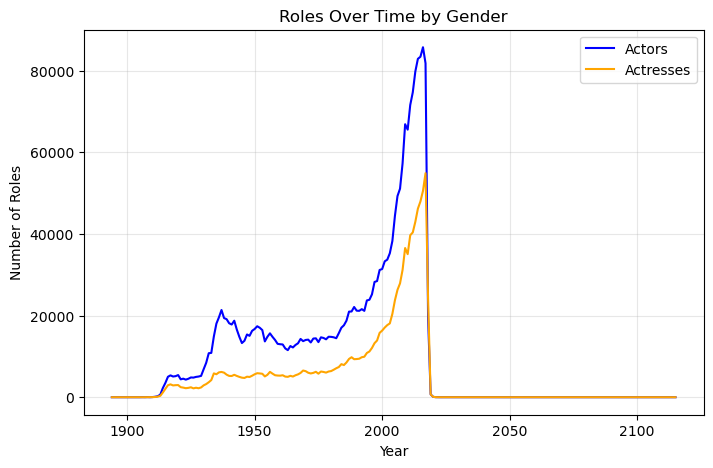

In [26]:
# Q8) Roles for actors & actresses over time
actors_only = actors[actors["type"].str.lower() == "actor"]
actresses_only = actors[actors["type"].str.lower() == "actress"]

roles_actors = actors_only.groupby("year").size()
roles_actresses = actresses_only.groupby("year").size()

plt.figure(figsize=(8,5))
plt.plot(roles_actors.index, roles_actors.values, label="Actors", color="blue")
plt.plot(roles_actresses.index, roles_actresses.values, label="Actresses", color="orange")
plt.title("Roles Over Time by Gender")
plt.xlabel("Year"); plt.ylabel("Number of Roles")
plt.legend(); plt.grid(alpha=0.3)
plt.show()



9. How many "leading roles" were there in the 2000's?

In [24]:
start_year = 2000
end_year = 2009
leading_ranks = [1, 2]

leading_roles_2000s = cast[
    (cast['year'] >= start_year) & 
    (cast['year'] <= end_year) & 
    (cast['n'].isin(leading_ranks))
].shape[0]

print(f"Number of leading roles (n=1 or n=2) in the {start_year}'s: {leading_roles_2000s}")


Number of leading roles (n=1 or n=2) in the 2000's: 45740


10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [29]:
nr_2000s = actors[(actors["year"].between(2000, 2009)) & (actors["n"].isna())]
nr_1950s = actors[(actors["year"].between(1950, 1959)) & (actors["n"].isna())]

print("No ranking:")
print("  2000s:", len(nr_2000s))
print("  1950s:", len(nr_1950s))



No ranking:
  2000s: 232037
  1950s: 95406


-A higher number of missing rankings in the 1950s suggests that older movie records are less complete or standardized
-In the 2000s, most films have digital metadata and are added to IMDb directly by studios, meaning ranking data is more likely to be filled in.

In conclusion the numbers reflect better data collection and digital record-keeping in modern times.

11. Plot the number of films made in each decade

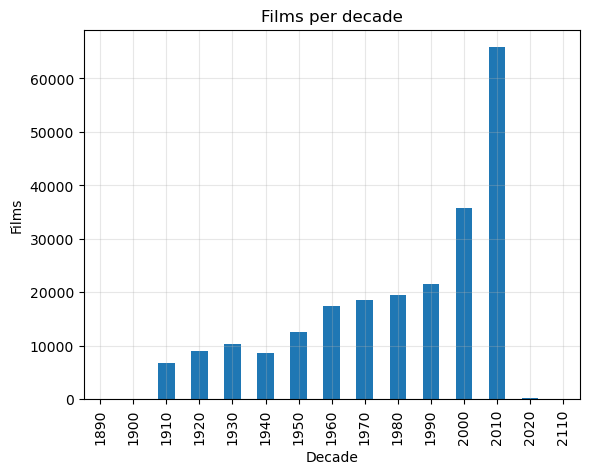

In [30]:
movies = titles[is_movie & titles["year"].notna()].copy()
movies["decade"] = (movies["year"] // 10 * 10).astype("Int64")
films_per_decade = movies.groupby("decade").size()

plt.figure()
films_per_decade.plot(kind="bar")
plt.title("Films per decade")
plt.xlabel("Decade"); plt.ylabel("Films"); plt.grid(alpha=0.3)
plt.show()


12. Plot the number of films with a Rustler character over time

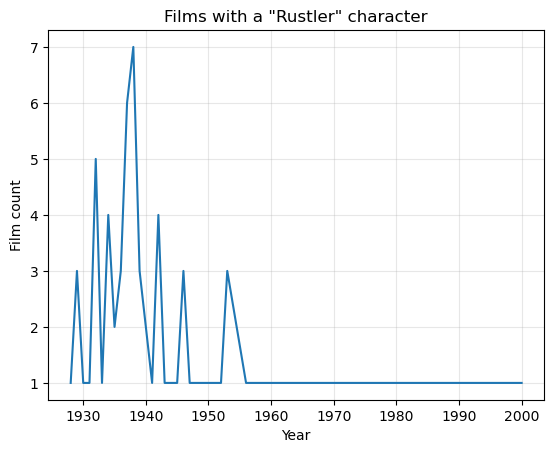

In [31]:
rust = cast[cast["character"].astype(str).str.startswith("Rustler", na=False)]
rust = rust.merge(titles[["title_id","year"]], on="title_id", how="left") if "title_id" in cast and "title_id" in titles else rust
by_year = rust.dropna(subset=["year"]).groupby("year")["title"].nunique() if "title" in rust else \
          rust.dropna(subset=["year"]).groupby("year").size()

plt.figure()
by_year.sort_index().plot()
plt.title('Films with a "Rustler" character'); plt.xlabel("Year"); plt.ylabel("Film count")
plt.grid(alpha=0.3); plt.show()


13. What are the top ten character names of all time?

In [32]:
top_chars = (cast["character"].astype(str)
             .str.strip().replace("", np.nan).dropna()
             .value_counts()
             .head(10))
display(top_chars)


character
Himself        19673
Dancer         12027
Extra          10848
Reporter        7818
Doctor          6971
Party Guest     6787
Student         6637
Policeman       6426
Bartender       6292
Herself         6281
Name: count, dtype: int64

14. Which actor appeared in the most films in the 1990's decade?

In [35]:
dates = actors[actors["year"].between(1990, 1999)]

top_actor = (dates.groupby("name")["title"]
             .nunique()
             .sort_values(ascending=False)
             .head(1))


actor_name = top_actor.index[0]
film_count = int(top_actor.iloc[0])
print(f"The actor who appeared in the most films in the 1990s is {actor_name} ({film_count} films).")



The actor who appeared in the most films in the 1990s is Shakti Kapoor (130 films).


15. What are the top 10 roles that start with Science?

In [36]:
mask = cast["character"].astype(str).str.startswith("Science", na=False)
display(cast.loc[mask, "character"].value_counts().head(10))


character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64

16. What film has the largest cast

In [37]:
cast_sizes = cast.groupby("title_id").size().rename("cast_size") if "title_id" in cast else \
             cast.groupby("title").size().rename("cast_size")
largest = (cast_sizes.sort_values(ascending=False)
           .head(1)
           .to_frame()
           .reset_index())
if "title_id" in largest.columns and "title_id" in titles:
    largest = largest.merge(titles[["title_id","title","year"]], on="title_id", how="left")
display(largest)


,title,cast_size
0,Around the World in 80 Days,1364


17. Generate descriptive statistics for cast size. Briefly comment on the results

In [38]:
stats = cast_sizes.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
display(stats)



count    168254.000000
mean         20.462491
std          24.206663
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
90%          46.000000
95%          63.000000
99%         115.000000
max        1364.000000
Name: cast_size, dtype: float64

-The average cast size is around 20 actors per film, meaning most movies feature a moderate number of performers.
-The minimum cast size is 1, representing solo performances or incomplete data
-The maximum cast size of 1,364 shows that some productions (like Around the World in 80 Days) have extremely large ensembles.
-The 75th percentile (26) indicates that only 25% of movies have more than 26 actors.
-The 99th percentile (115) highlights a few extreme outliers with exceptionally large casts.

18. How many films has Natalie Portman been in in each year throughout her career?

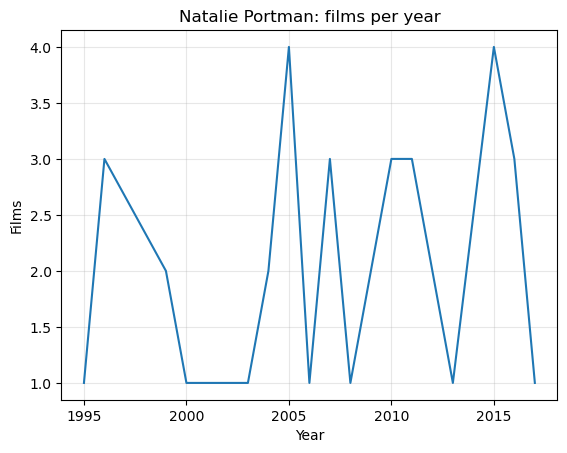

In [39]:
np_all = cast[cast["name"].str.casefold() == "natalie portman"]
np_all = np_all.merge(titles[["title_id","title","year"]], on="title_id", how="left") if "title_id" in cast and "title_id" in titles else np_all
np_per_year = np_all.dropna(subset=["year"]).groupby("year")["title"].nunique() if "title" in np_all else \
              np_all.dropna(subset=["year"]).groupby("year")["title_id"].nunique()

plt.figure()
np_per_year.sort_index().plot()
plt.title("Natalie Portman: films per year")
plt.xlabel("Year"); plt.ylabel("Films"); plt.grid(alpha=0.3)
plt.show()


19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [40]:
np_top = np_all[np_all["n"].isin([1, 2])]
np_top_year = np_top.dropna(subset=["year"]).groupby("year")["title"].nunique() if "title" in np_top else \
              np_top.dropna(subset=["year"]).groupby("year")["title_id"].nunique()
display(np_top_year.sort_index())


year
1999    1
2000    1
2002    1
2005    3
2006    1
2007    1
2008    1
2009    1
2010    1
2011    2
2013    1
2015    2
2016    2
Name: title, dtype: int64

20. Determine how many roles for actor or actress by decade. Plot the output

<Figure size 1200x600 with 0 Axes>

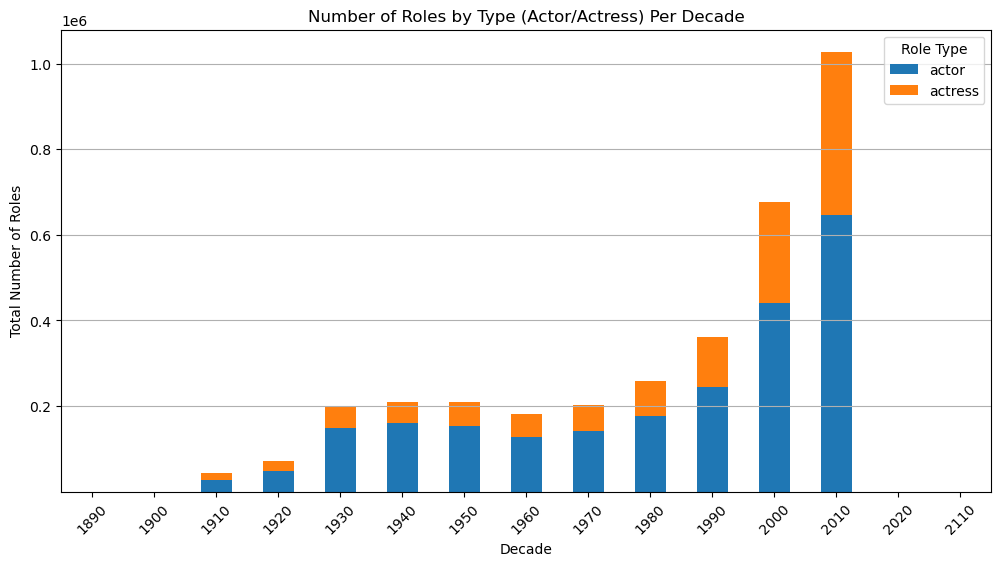

In [45]:
cast['decade'] = (cast['year'] // 10) * 10
roles_by_decade_type = cast.groupby(['decade', 'type']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
roles_by_decade_type.plot(kind='bar', stacked=True, figsize=(12, 6), 
                          title='Number of Roles by Type (Actor/Actress) Per Decade')
plt.xlabel('Decade')
plt.ylabel('Total Number of Roles')
plt.xticks(rotation=45)
plt.legend(title='Role Type')
plt.grid(axis='y')
plt.show() 



21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [50]:
valid_rd = release_dates.dropna(subset=["date"]).copy()
valid_rd["dow"] = valid_rd["date"].dt.day_name()
valid_rd["month"] = valid_rd["date"].dt.month

pvt = pd.pivot_table(valid_rd, index="dow", columns="month", values="title", aggfunc="nunique", fill_value=0)

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pvt = pvt.reindex(order)

display(pvt)



month,1,2,3,4,5,6,7,8,9,10,11,12
dow,,,,,,,,,,,,
Monday,3557,2991,3227,3056,2940,2276,2198,2744,2994,3389,3225,3069
Tuesday,1776,1138,1275,1409,1302,1132,1108,1089,1276,1497,1358,1758
Wednesday,4120,3488,3798,3863,3636,3511,3379,3522,3615,3879,3849,4053
Thursday,6999,6227,7401,7014,6763,6315,5913,6516,7124,7609,7247,6909
Friday,9187,8733,9727,9091,9175,8310,8032,9042,9790,9994,9444,8791
Saturday,2855,2334,2654,2786,2203,2353,2209,2179,2488,2634,2483,3136
Sunday,1776,1252,1214,1331,1151,1015,880,1125,1301,1393,1319,1738


22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

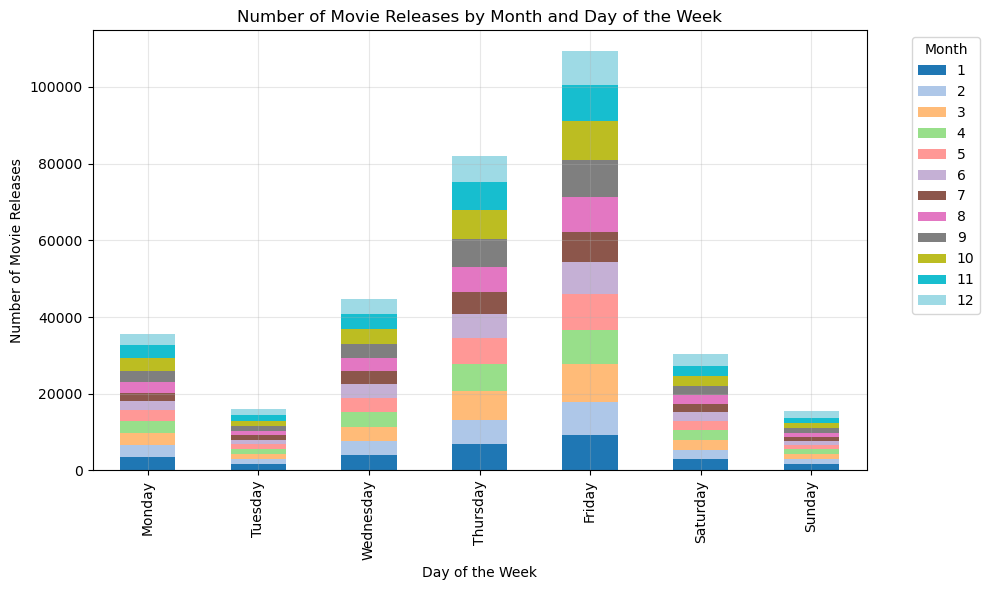

In [52]:
pvt.plot(kind='bar',stacked=True,figsize=(10, 6), colormap='tab20')

plt.title('Number of Movie Releases by Month and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Movie Releases')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


23. What films did actors in Star Wars go on to appear in?

In [55]:
# Identify the 1977 Star Wars film robustly
sw1977 = cast[
    cast['title'].str.match(r'^Star Wars', na=False) & (cast['year'] == 1977)
]

# Actors/actresses in that film
sw_people = sw1977.loc[sw1977['type'].isin(['actor', 'actress']), 'name'].unique()

# Films those people appeared in AFTER 1977 (exclude Star Wars titles and ensure actor/actress)
follow_on = cast[
    cast['name'].isin(sw_people)
    & cast['type'].isin(['actor', 'actress'])
    & (cast['year'] > 1977)
    & ~cast['title'].str.match(r'^Star Wars', na=False)
].copy()

# 1) The films (unique, sorted by year)
subsequent_films = follow_on[['title', 'year']].drop_duplicates().sort_values('year')
print(f"Unique follow-on films after 1977: {len(subsequent_films)}")
print(subsequent_films.head(50))  # preview; remove head() to print all

# 2) Who was most prolific after 1977 (by unique films)?
prolific_after = (follow_on.groupby('name')['title']
                  .nunique()
                  .sort_values(ascending=False)
                  .head(20))
print("\nTop 20 Star Wars (1977) actors by unique films AFTER 1977:")
print(prolific_after)



Unique follow-on films after 1977: 517
                                         title  year
661969                  Force 10 from Navarone  1978
281989                         A Hitch in Time  1978
263969                                Superman  1978
2124677                            Loose Shoes  1978
3185170                   International Velvet  1978
893403                           The Big Sleep  1978
662009                               Sweeney 2  1978
2022064         The Chant of Jimmie Blacksmith  1978
2022065         The King of the Two Day Wonder  1978
480384                         Bruges-La-Morte  1978
662031                   The Thirty-Nine Steps  1978
480397                   The Lord of the Rings  1978
110047                           Wombling Free  1978
281991                          Let's Get Laid  1978
1759246                   Warlords of Atlantis  1978
838214                            Rupan sansei  1978
848920                         Corvette Summer  1978
1358440